About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the [dataset about Pokemons](https://www.kaggle.com/datasets/abcsds/pokemon)

In [43]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Task 1 (1 point)

Investigate  the type of every feature. Is it numerical or cetegorical (nominal or ordinal)? Explain, why.

You may need to check the type of the column or consult the description of the data on Kaggle.com

*Let's begin. First, here's description of the data:*

#: ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round




In [5]:
print(df.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


Let's make pearson's correlations heatmap for numerical variables

<Axes: >

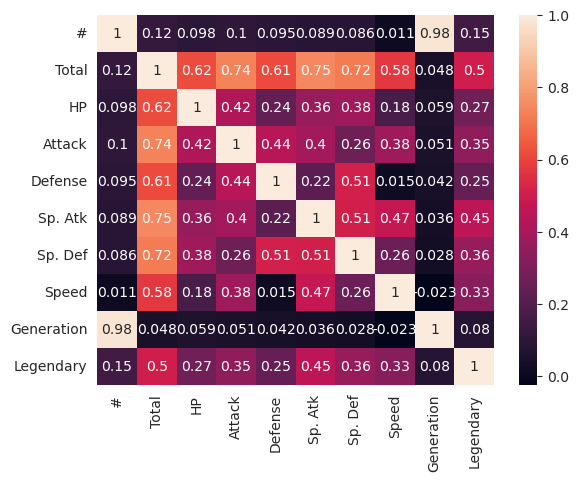

In [12]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True),annot=True)

So we have that. If we happen to predict some features of pokemons we can actually predict the pokemon by some set of features. As an example let's see how well can we predict hp based on other characteristics 

In [13]:
df.corr(numeric_only=True).columns

Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

In [42]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

df['Legendary_dummy'] = df['Legendary'].astype('int')

model1 = sm.OLS(endog=df['HP'], exog=sm.add_constant(df['Attack'])).fit()
model2 = sm.OLS(endog=df['HP'], exog=sm.add_constant(df[['Attack', 'Defense']])).fit()
model3 = sm.OLS(endog=df['HP'], exog=sm.add_constant(df[['Attack', 'Defense', 'Speed', 'Sp. Atk']])).fit()
model4 = sm.OLS(endog=df['HP'], exog=sm.add_constant(df[['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'Legendary_dummy']])).fit()


Stargazer([model1, model2, model3, model4])

Even though we didn't get best predictors with high loss, anyway we can see that 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', and 'Legendary_dummy' explain up to  28% of any pokemon hp. That also indicate high p values and R adjusted.

Some other variables also can be converted to dummies like Legendarity but unline those Legendarity is already binary. 

# Task 2 (1 point)

It is said in the description of the dataset that `Total` is the sum of the stats after it. Let's check, if it is true.

Create a new column `'New Total'`, what is the sum of `HP, 	Attack,	Defense,	Sp. Atk,	Sp. Def,	Speed`

In [44]:
df['New Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk',	'Sp. Def', 'Speed']].sum(axis=1)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,New Total
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,680


Now, print the number of rows that contain deifferent   `'Total'` and `'New Total'` values and depict these rows.

Hint: compare columns `'Total'` and `'New Total'` and filter rows using the comparison.


In [47]:
df.loc[df['New Total'] != df['Total']].shape[0] # rows

0

# Task 3 (2 points)

Create a frequency table for the `'Type 1'` feature

In [58]:
freq = df['Type 1'].value_counts()
freq

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Also, add proportions and percentage for every type  to the table.

Hint: `Series.to_frame` may be a useful function

In [59]:
freq = freq.reset_index()
freq['%'] = freq['count'] / freq['count'].sum() * 100
freq

,Type 1,count,%
0,Water,112,14.000
1,Normal,98,12.250
2,Grass,70,8.750
3,Bug,69,8.625
4,Psychic,57,7.125
5,Fire,52,6.500
6,Electric,44,5.500
7,Rock,44,5.500
8,Dragon,32,4.000
9,Ground,32,4.000


Draw a plot to depict the percentage. Make sure to make labels/ticks readable.

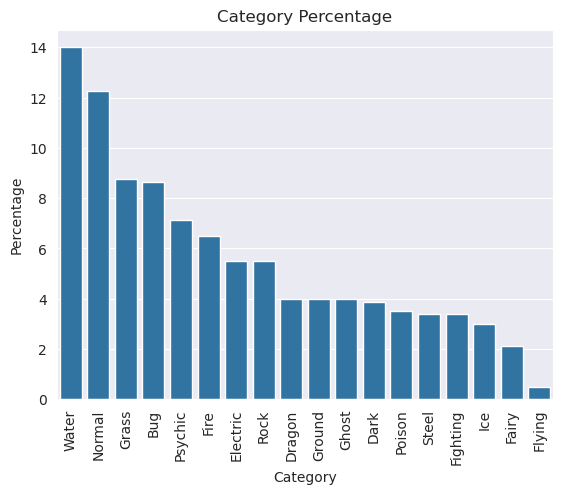

In [71]:
sns.barplot(x='Type 1', y='%', data=freq[['Type 1', '%']])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Percentage')
plt.xticks(rotation=90)

# Display plot
plt.show()

Draw conclusions from the plot. (Are there a lot of differnet types? What is the most/least popular type? ...)

**Answer** \#YOUR ANSWER

# Task 4 (2 points)

Compue the measures of central tendency for the `Sp. Atk` feature

In [72]:
col = 'Sp. Atk'

print(f"Mean of Sp. Atk: {df[col].mean()}")
print(f"Median of Sp. Atk: {df[col].median()}")
print(f"Mode of Sp. Atk: {df[col].mode()[0]}")

Mean of Sp. Atk: 72.82
Median of Sp. Atk: 65.0
Mode of Sp. Atk: 60


Draw a histogram for the feature and depict the measures on it

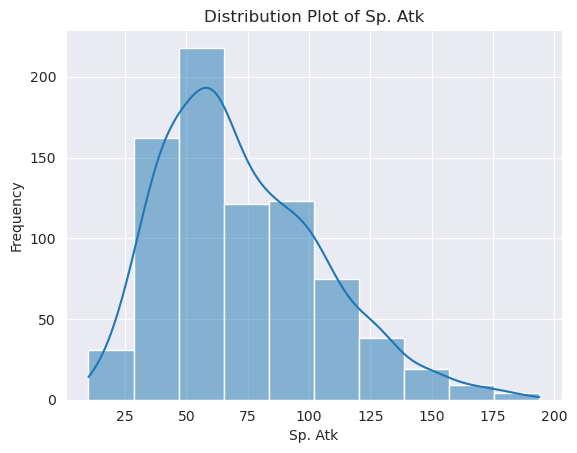

In [78]:
sns.histplot(df['Sp. Atk'], bins=10, kde=True)

plt.xlabel('Sp. Atk')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Sp. Atk')


plt.show()

Is the distribution skewed? Explain your answer.



<Axes: ylabel='Sp. Atk'>

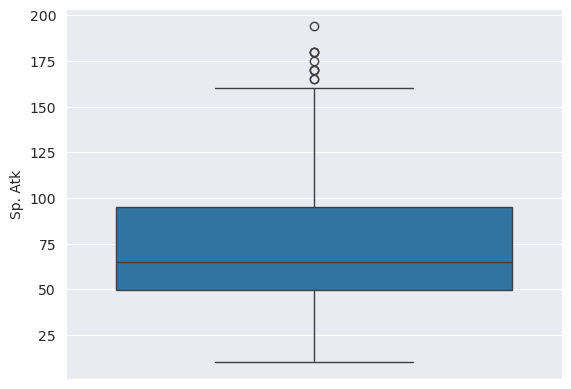

In [81]:
sns.boxplot(df['Sp. Atk'])

The histogram measures frequency of special attack among all pokemons. Distribytion is skewed to the left which is depicted more clearly on boxplot (distances between mean and quantiles )

# Task 5 (2 point)

Now, compute measures of central tendencies for legendary and not legendary separately. Is there any difference?

Mean of Sp. Atk: 122.18461538461538
Median of Sp. Atk: 120.0
Mode of Sp. Atk: 150


<Axes: ylabel='Sp. Atk'>

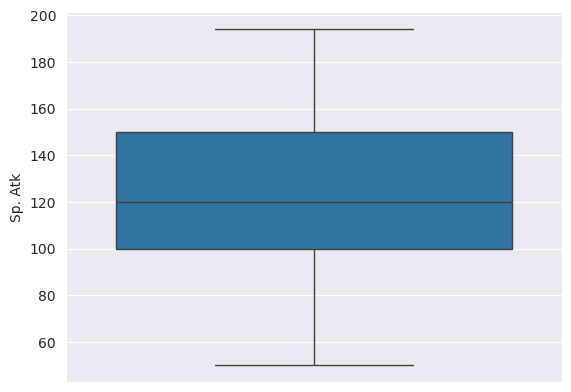

In [83]:
col = 'Sp. Atk'

tmp = df.loc[df['Legendary'] == True]

print(f"Mean of Sp. Atk: {tmp[col].mean()}")
print(f"Median of Sp. Atk: {tmp[col].median()}")
print(f"Mode of Sp. Atk: {tmp[col].mode()[0]}")

sns.boxplot(tmp['Sp. Atk'])

Mean of Sp. Atk: 68.45442176870748
Median of Sp. Atk: 65.0
Mode of Sp. Atk: 60


<Axes: ylabel='Sp. Atk'>

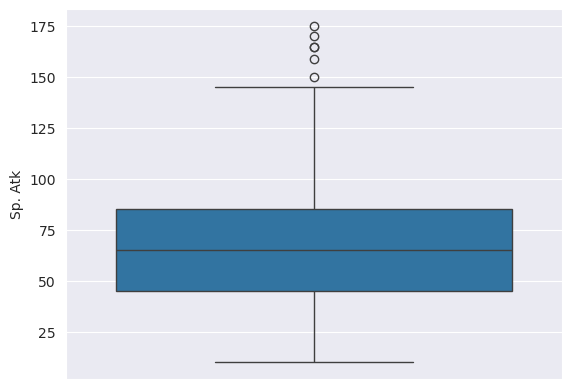

In [84]:
col = 'Sp. Atk'

tmp = df.loc[df['Legendary'] == False]

print(f"Mean of Sp. Atk: {tmp[col].mean()}")
print(f"Median of Sp. Atk: {tmp[col].median()}")
print(f"Mode of Sp. Atk: {tmp[col].mode()[0]}")

sns.boxplot(tmp['Sp. Atk'])

As we can see from boxplots with Legendary TRUE the distribution has more normal shape than otherwise

Draw the hisograms on one plot.

Hint: use `hue` in `sns.histplot`

<Axes: xlabel='Sp. Atk', ylabel='Count'>

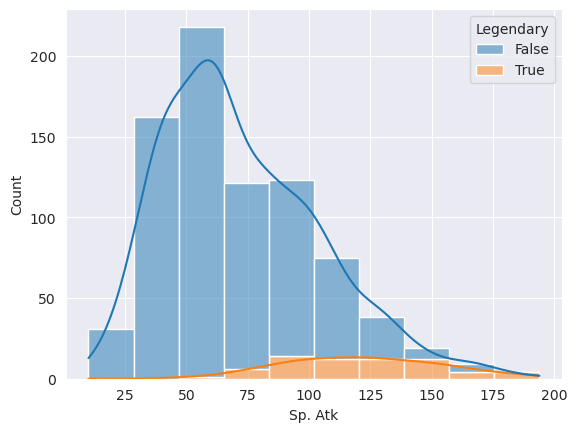

In [88]:
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', bins=10, kde=True, multiple='stack')

# Task 6 (2 point)

There is a problem that bars for legendary pokemons are significantly smaller than the bars for non-legendary. Explain, why is it happening

In [93]:
print(f'number of legendary pokemons {df.loc[df['Legendary'] == True].shape[0]}')
print(f'number of non-legendary pokemons {df.loc[df['Legendary'] == False].shape[0]}')

number of legendary pokemons 65
number of non-legendary pokemons 735


So as we know the distogram measures frequencies and because there are less legendary pokemons than ordinal their frequencies are low

Fix the histogram (make the bars comparable hights), so it wil be more convenient to compare the distributions.

Hint: consult the [documentation for the histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) and find, which optional arguments may help.

<Axes: xlabel='Sp. Atk', ylabel='Count'>

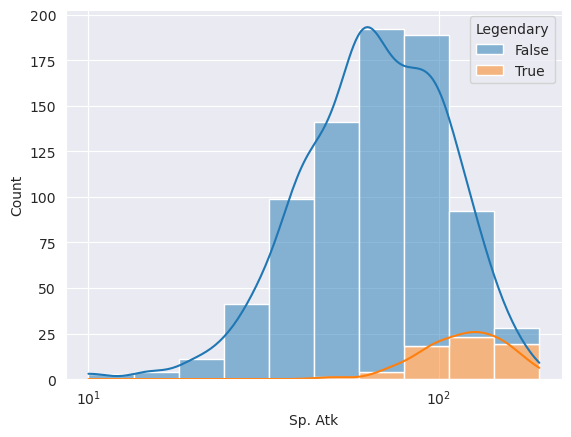

In [106]:
sns.histplot(data=df, x='Sp. Atk', hue='Legendary', bins=10, kde=True, multiple='stack', log_scale=True, common_norm=True, common_bins=True)

Now, make conclusions about the distributions

So we've tried to smooth the distributions with kde and normalize them using common bin sized and normalized statistics. Also to fix the shape we used logarithm scale. Distributions are now right sked but yet may me comparable  because they are skewed in the same way.